**Leaky Integrate-Fire Neuron 2**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

\begin{equation}
\tau_m \frac{d}{dt} V(t) = E_L - V(t) + R I(t) \quad \text{if} \quad V(t) \leq V_{th}
\end{equation}
\begin{equation}

**Stochastic Stimulation**

$$
\begin{equation}
I(t) = I_{\text{mean}} \left( 1 + 0.1 \sqrt{\frac{t_{\text{max}}}{\Delta t}} \, \xi(t) \right) \quad \text{with} \quad \xi(t) \sim U(-1, 1)
\end{equation}
$$

**Histogram Plotting**

\begin{equation} N = \sum_{j=1}^{J} m_j \end{equation}

where m is a function that counts the number of samples that fall into j bin.

A bin is a single range of continuous values used to group values in a chart.

In [2]:
'''Defining Constants for LIF'''
t_max = 150e-3 #seconds
dt = 1e-3 #seconds
tau = 20e-3 #seconds membrane time constant
el = -60e-3 #milivolt leak potential
vr = -70e-3 #milivolt 
vth = -50e-3 #milivolt
r = 100e6 #ohm
i_mean = 25e-11 #ampre

print (t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


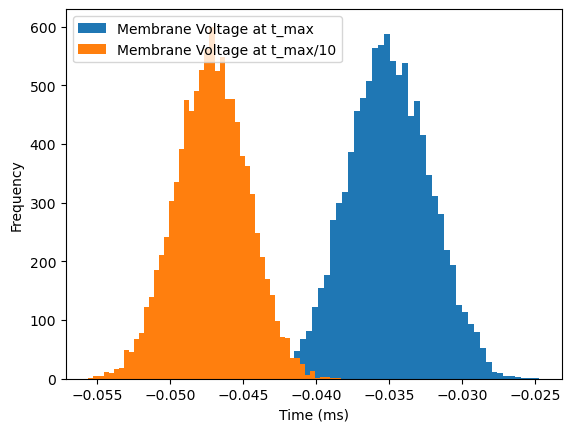

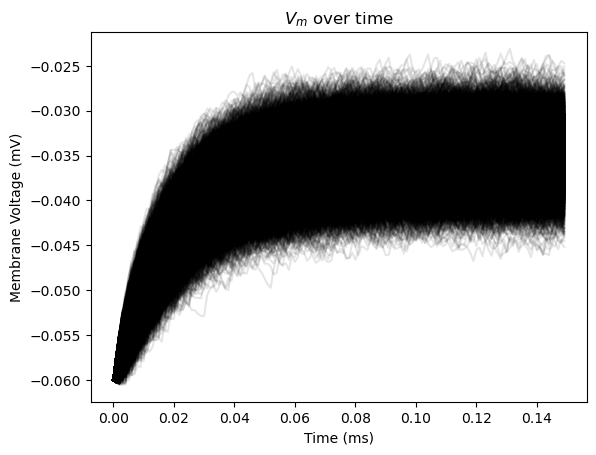

In [3]:
'''Generating Histogram for 500 LIF trials under the same stochastic protocol'''
#Specifying random module seed
np.random.seed(2020)

#initializing arrays and variables
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 10000
v_n = np.ones([n, step_end]) * el
i = i_mean * (1 + 0.1 * np.sqrt(t_max/dt) * (2* np.random.random((n,step_end))-1))

for step, t in enumerate(t_range):

    if step == 0:
        continue

    v_n[:, step] = v_n[:, step-1] + (dt/tau) * (el - v_n[:, step-1] + r * i[:, step-1])

#Constructing the histogram
plt.figure()
plt.xlabel('Time (ms)')
plt.ylabel('Frequency')
#at t_max
plt.hist(v_n[:, int(t_max/dt)-1], 50, label = 'Membrane Voltage at t_max')
#at t_max/10
plt.hist(v_n[:, int(t_max/(10*dt))-1], 50, label = 'Membrane Voltage at t_max/10')
plt.legend()
plt.show()

#Plotting the Voltage variation over time
plt.figure()
plt.title('$V_m$ over time')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Voltage (mV)')
plt.plot(t_range, v_n.T, 'k', alpha = 0.1)
plt.show()


**Modeling Spiking Neuronal Activity**

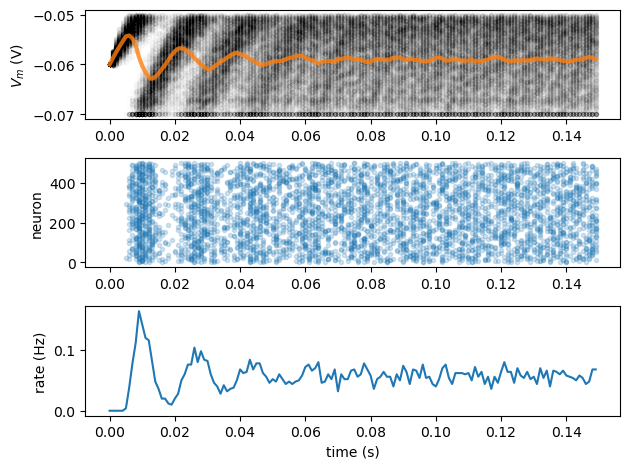

In [4]:
# Set random number generator
np.random.seed(2020)
# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize spikes and spikes_n
'''
Dictionaries to record spike times for each neuron and number of spikes at each time step
Spikes:
The dictionary keys are the indices of the neurons (from 0 to n-1), and the values are lists that will hold the spike times for each corresponding neuron.
spikes_n:
is a NumPy array that counts the number of spikes at each time step across all neurons.
Structure: The array has a length of step_end, which is the total number of time steps in the simulation.
'''
spikes = {j: [] for j in range(n)}
spikes_n = np.zeros([step_end])

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step == 0:
    continue

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

  # Loop over simulations
  for j in range(n):

    # Check if voltage above threshold
    if v_n[j, step] >= vth: #If above v_threshold, reset to membrane voltage, add spike time to the dictionary of neuron n in spikes[j], add one spike count to the dictionary spikes_n[step] at time 'step'

      # Reset to reset voltage
      v_n[j, step] = vr

      # Add this spike time
      spikes[j] += [t]

      # Add spike count to this step
      spikes_n[step] += 1

# Collect mean Vm and mean spiking rate
v_mean = np.mean(v_n, axis=0)
spikes_mean =  spikes_n / n

# Initialize the figure
plt.figure()

# Plot simulations and sample mean
ax1 = plt.subplot(3, 1, 1)
for j in range(n):
  plt.scatter(t_range, v_n[j], color="k", marker=".", alpha=0.01)
plt.plot(t_range, v_mean, 'C1', alpha=0.8, linewidth=3)
plt.ylabel('$V_m$ (V)')

# Plot spikes
plt.subplot(3, 1, 2, sharex=ax1)
# for each neuron j: collect spike times and plot them at height j
for j in range(n):
  times = np.array(spikes[j])
  plt.scatter(times, j * np.ones_like(times), color="C0", marker=".", alpha=0.2) #y-coordinate of this second subplot is the simple neuron indices that are randomly assigned for j in (n), so no physical meaning. Having these 500 rows, only makes it clear and help seperate the rows. 

plt.ylabel('neuron')

# Plot firing rate
plt.subplot(3, 1, 3, sharex=ax1)
plt.plot(t_range, spikes_mean)
plt.xlabel('time (s)')
plt.ylabel('rate (Hz)')

plt.tight_layout()

In [35]:
'''Helper Function for Plotting'''

def plot_all(t_range, v_n, raster = None , spikes = None, spikes_mean = None):

  # Define the new x-axis limits (0 to 140 milliseconds)
  x_start = 0
  x_end = 140e-3

  # Initialize the figure
  plt.figure()

  # Define the y-axis limits (0 to number of neurons)
  y_start = 0
  y_end = 50
  

  # Plot simulations and sample mean
  ax1 = plt.subplot(4, 1, 1)
  for j in range(n):
    plt.scatter(t_range, v_n[j], color="k", marker=".", alpha=0.01)
    plt.plot(t_range, v_mean, 'C1', alpha=0.8, linewidth=3)
    plt.ylabel('$V_m$ (V)')


  # Ploting raster plot
  plt.subplot(4, 1, 2, sharex=ax1)
  # for j in range(n):
  #   times = np.array(raster[j])
  #   plt.scatter(np.array(times), j * np.ones_like(times), color="k", marker="|", alpha=0.5)
  plt.imshow(raster, cmap='gray', interpolation='nearest', aspect = 'auto', extent=[x_start, x_end, y_start, y_end])

  # Plot spikes
  #plt.subplot(4, 1, 3, sharex=ax1) #for each neuron j: collect spike times and plot them at height j
  #for j in range(n):
    # times = np.array(spikes[j])
    # plt.scatter(times, j * np.ones_like(times), color="C0", marker=".", alpha=0.2) #y-coordinate of this second subplot is the simple neuron indices that are randomly assigned for j in (n), so no physical meaning. Having these 500 rows, only makes it clear and help seperate the rows. 


  plt.ylabel('neuron')

  #Plot firing rate
  plt.subplot(4, 1, 4, sharex=ax1)
  plt.plot(t_range, spikes_mean)

  plt.xlabel('time (s)')
  plt.ylabel('rate (Hz)')
  plt.tight_layout()
  
 

**Boolean Indexing(True or False)**

TypeError: Image data of dtype object cannot be converted to float

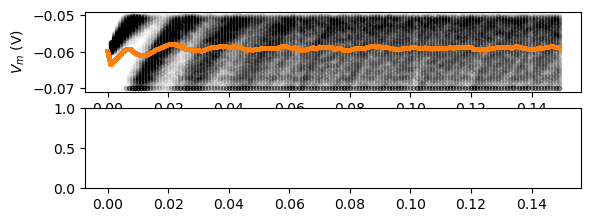

In [37]:
'''Using Boolean Indexing to replace unecessary loops'''
import numpy as np
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize spikes and spikes_n
spikes = {j: [] for j in range(n)}
spikes_n = np.zeros([step_end])


# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step == 0:
    continue

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

  # Initialize boolean numpy array `spiked` with v_n > v_thr
  spiked = (v_n[:,step] >= vth)

  # Set relevant values of v_n to resting potential using spiked
  v_n[spiked,step] = vr

  # Collect spike times
  for j in np.where(spiked)[0]:
    spikes[j] += [t]
    spikes_n[step] += 1

# Collect mean spiking rate
spikes_mean = spikes_n / n

# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, raster = None, spikes=spikes, spikes_mean=spikes_mean)



**Plotting binary raster plot, for improved calculation and figure generation efficiency**

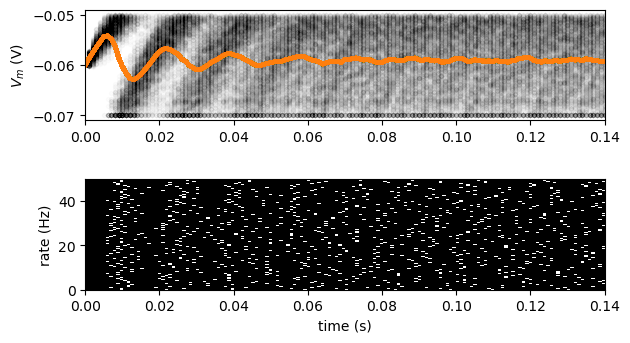

In [ ]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

spikes_mean = np.ones([step_end])


# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step==0:
    continue

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

  # Initialize boolean numpy array `spiked` with v_n > v_thr
  spiked = (v_n[:,step] >= vth)

  # Set relevant values of v_n to v_reset using spiked
  v_n[spiked,step] = vr

  # Set relevant elements in raster to 1 using spiked
  raster[spiked,step] = 1.



v_mean = np.mean(v_n, axis=0)


# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, raster)

**Introducing Refractory period of 10ms**

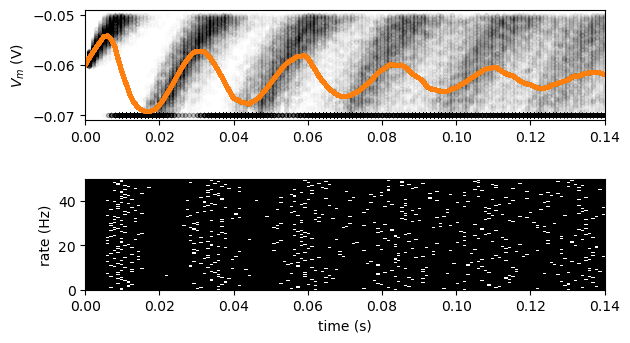

In [ ]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Initialize t_ref and last_spike
t_ref = 0.01
last_spike = -t_ref * np.ones(n)

spikes = {j: [] for j in range(n)}
spikes_n = np.zeros([step_end])

# Loop over time steps
for step, t in enumerate(t_range):
   # Skip first iteration
  if step == 0:
    continue

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

  # Initialize boolean numpy array `spiked` with v_n > v_thr
  spiked = v_n[:,step] >= vth
  
  # Set relevant values of v_n to v_reset using spiked
  v_n[spiked,step] = vr

  # Set relevant elements in raster to 1 using spiked
  raster[spiked,step] = 1.

  # Initialize boolean numpy array clamped using last_spike, t and t_ref
  clamped = (last_spike + t_ref) > t

  # Reset clamped neurons to vr using clamped
  v_n[clamped,step] = vr

  # Update numpy array last_spike with time t for spiking neurons
  last_spike[spiked] = t

# Collect mean Vm and mean spiking rate
v_mean = np.mean(v_n, axis=0)
spikes_mean =  spikes_n / n

# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, raster)


# Introducing Random Refractory Time
$$t=\mu+\sigma * N$$

**Defining functions**

In [47]:
def ode_step(v, i, dt):
    v = v + dt/tau * (el - v + r * i)
    return v

def spike_clamp(v, delta_spike, vth, vr, t_ref):
    # Boolean array spiked indexes neurons with v>=vth
    spiked = (v >= vth)
    v[spiked] = vr

    # Boolean array clamped indexes refractory neurons
    clamped = (delta_spike < t_ref)
    v[clamped] = vr

    return v, spiked



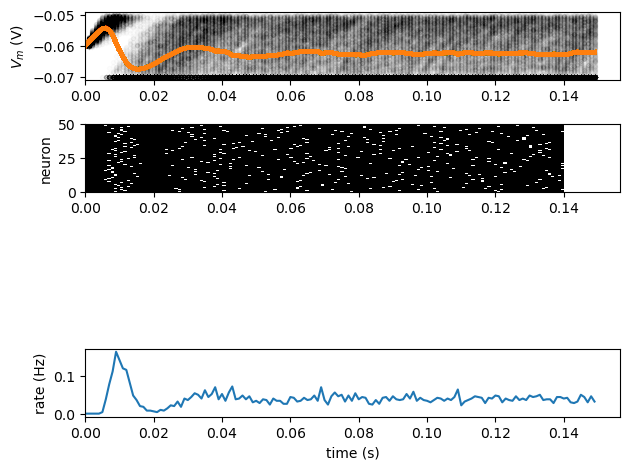

In [51]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

#Initialize raster plot
raster = np.zeros([n,step_end])


#Random Refractory Time
mu = 0.01
sigma = 0.007
t_ref = mu + sigma * np.random.normal(size = n)
t_ref[t_ref<0] = 0

#Dubug
# t_ref = 0.01
last_spiked = -t_ref * np.ones(n)


#loop over time
for step, t in enumerate(t_range):

    #Avoid calculating the inital v
    if step == 0:
        continue

    #print(v_n[:,step-1])

    #compute v_n
    # print(f'step-1: {step-1}\nv_n:{v_n[:,step-1]}')
    v_n[:,step] = ode_step(v_n[:,step-1], i[:,step], dt)
    
    #Spike control
    v_n[:, step], spiked = spike_clamp(v_n[:,step], (t - last_spiked), vth, vr, t_ref)

    #update raster and last_spiked

    raster[spiked, step] = 1.

    last_spiked[spiked] = t

# Collect mean Vm and mean spiking rate
v_mean = np.mean(v_n, axis=0)
spikes_mean = np.sum(raster, axis=0)/n

plot_all(t_range, v_n, raster, spikes_mean=spikes_mean)

**class tutorial**

Ran for 0.15s in 150 steps.


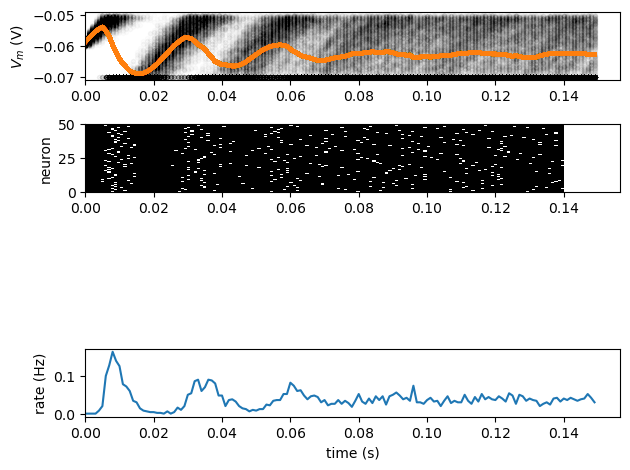

In [59]:
# Simulation class
class LIFNeurons:
  def __init__(self, n, t_ref_mu=0.01, t_ref_sigma=0.002,
               tau=20e-3, el=-60e-3, vr=-70e-3, vth=-50e-3, r=100e6):

    # Neuron count
    self.n = n

    # Neuron parameters
    self.tau = tau        # second
    self.el = el          # milivolt
    self.vr = vr          # milivolt
    self.vth = vth        # milivolt
    self.r = r            # ohm

    # Initializes refractory period distribution
    self.t_ref_mu = t_ref_mu
    self.t_ref_sigma = t_ref_sigma
    self.t_ref = self.t_ref_mu + self.t_ref_sigma * np.random.normal(size=self.n)
    self.t_ref[self.t_ref<0] = 0

    # State variables
    self.v = self.el * np.ones(self.n)
    self.spiked = self.v >= self.vth
    self.last_spike = -self.t_ref * np.ones([self.n])
    self.clamp = self.last_spike <= self.t_ref
    self.t = 0.
    self.steps = 0


  def ode_step(self, dt, i):

    # Update running time and steps
    self.t += dt
    self.steps += 1

    # One step of discrete time integration of dt
    self.v = self.v + dt / self.tau * (self.el - self.v + self.r * i)


    # Spike and clamp
    self.spiked = (self.v > self.vth)
    self.v[self.spiked] = self.vr
    self.last_spike[self.spiked] = self.t
    
    clamped = self.t_ref >= (self.t - self.last_spike)
    self.v[clamped] = self.vr

    return self.v, self.spiked, self.last_spike

# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Initialize neurons
neurons = LIFNeurons(n)

# Loop over time steps
for step, t in enumerate(t_range):

  # Call ode_step method
  neurons.ode_step(dt, i[:,step])

  # Log v_n and spike history
  v_n[:,step] = neurons.v
  raster[neurons.spiked, step] = 1.

v_mean = np.mean(v_n, axis=0)
spikes_mean = np.sum(raster, axis=0)/n

# Report running time and steps
print(f'Ran for {neurons.t:.3}s in {neurons.steps} steps.')

# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, raster,spikes_mean=spikes_mean)